In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [2]:
#Cargamos el dataset y mostramos las 5 primeras fila
data = pd.read_csv("winequalityred.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

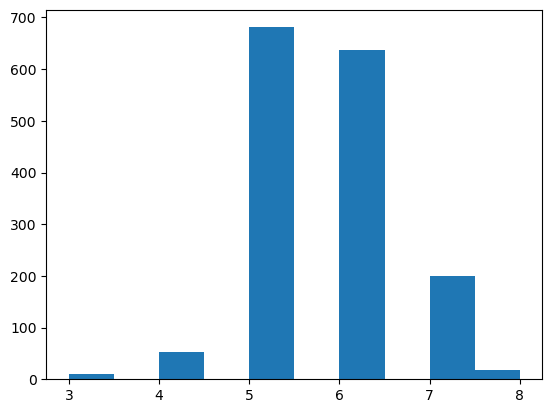

In [6]:
plt.hist(data.quality)

<Axes: xlabel='volatile acidity', ylabel='fixed acidity'>

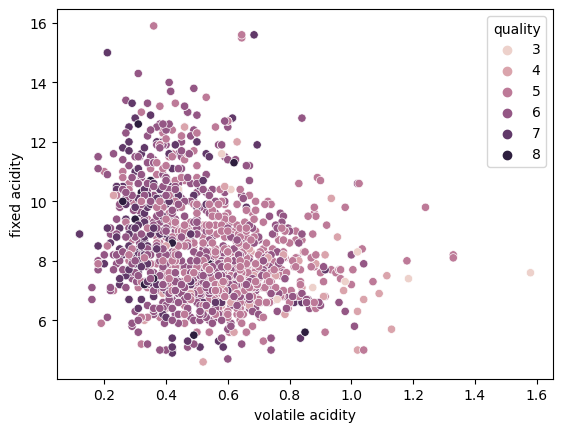

In [7]:
sns.scatterplot(x = "volatile acidity", y = "fixed acidity", hue = "quality", data = data)

In [8]:
predictors_col = [ "volatile acidity","fixed acidity","citric acid","alcohol"]
target_col = ['quality']

In [9]:
predictors = data[predictors_col]
target = data[target_col]

In [10]:
predictors

,volatile acidity,fixed acidity,citric acid,alcohol
0,0.700,7.4,0.00,9.4
1,0.880,7.8,0.00,9.8
2,0.760,7.8,0.04,9.8
3,0.280,11.2,0.56,9.8
4,0.700,7.4,0.00,9.4
...,...,...,...,...
1594,0.600,6.2,0.08,10.5
1595,0.550,5.9,0.10,11.2
1596,0.510,6.3,0.13,11.0
1597,0.645,5.9,0.12,10.2


In [11]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [12]:
corr = predictors.corr()
corr

,volatile acidity,fixed acidity,citric acid,alcohol
volatile acidity,1.000000,-0.256131,-0.552496,-0.202288
fixed acidity,-0.256131,1.000000,0.671703,-0.061668
citric acid,-0.552496,0.671703,1.000000,0.109903
alcohol,-0.202288,-0.061668,0.109903,1.000000


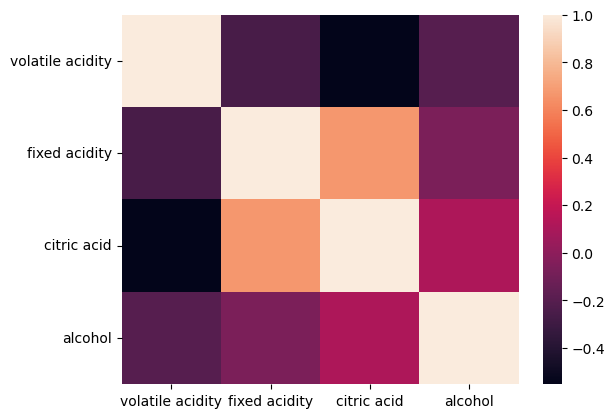

In [13]:
sns.heatmap(corr)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [15]:
tree = DecisionTreeClassifier()

In [16]:
arbol = tree.fit(X_train, y_train)

[Text(0.4859953487620634, 0.9782608695652174, 'x[3] <= 10.35\ngini = 0.644\nsamples = 1279\nvalue = [10, 43, 558, 492, 162, 14]'),
 Text(0.2151203529507506, 0.9347826086956522, 'x[0] <= 0.317\ngini = 0.521\nsamples = 714\nvalue = [7, 22, 442, 218, 23, 2]'),
 Text(0.036458333333333336, 0.8913043478260869, 'x[1] <= 11.7\ngini = 0.518\nsamples = 50\nvalue = [0, 1, 7, 33, 8, 1]'),
 Text(0.02389705882352941, 0.8478260869565217, 'x[3] <= 9.75\ngini = 0.422\nsamples = 42\nvalue = [0, 1, 7, 31, 3, 0]'),
 Text(0.013480392156862746, 0.8043478260869565, 'x[0] <= 0.265\ngini = 0.537\nsamples = 18\nvalue = [0, 1, 7, 10, 0, 0]'),
 Text(0.007352941176470588, 0.7608695652173914, 'x[2] <= 0.445\ngini = 0.37\nsamples = 9\nvalue = [0, 1, 1, 7, 0, 0]'),
 Text(0.004901960784313725, 0.717391304347826, 'x[0] <= 0.235\ngini = 0.219\nsamples = 8\nvalue = [0, 1, 0, 7, 0, 0]'),
 Text(0.0024509803921568627, 0.6739130434782609, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.007352941176470588, 0.6

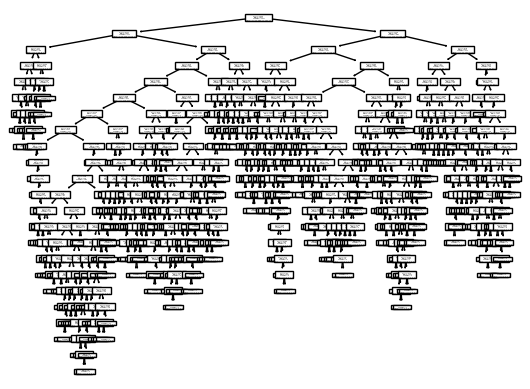

In [17]:
plot_tree(arbol)

In [18]:
predicciones = arbol.predict(X_test)

In [19]:
predicciones

array([5, 6, 5, 6, 6, 6, 4, 6, 6, 5, 7, 6, 5, 5, 5, 5, 7, 4, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 4, 6, 8, 6, 6,
       7, 5, 7, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       5, 6, 4, 6, 6, 7, 6, 7, 4, 6, 6, 5, 5, 5, 5, 7, 5, 6, 5, 7, 6, 5,
       6, 5, 6, 4, 5, 5, 6, 7, 6, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5,
       7, 5, 6, 4, 5, 6, 5, 7, 3, 6, 5, 5, 6, 6, 6, 6, 5, 7, 7, 5, 7, 5,
       6, 5, 7, 7, 7, 5, 5, 3, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5, 7, 5, 5, 5, 6, 7, 5, 6,
       5, 3, 5, 5, 6, 6, 7, 5, 5, 6, 7, 7, 6, 6, 5, 8, 5, 5, 5, 5, 5, 6,
       7, 6, 5, 6, 7, 7, 7, 6, 7, 6, 7, 5, 7, 3, 6, 6, 6, 3, 5, 5, 6, 7,
       6, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 5, 6, 7, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 5, 8, 7, 6, 6, 6, 8, 5, 6, 6, 4, 6, 5, 4, 8, 6,
       5, 5, 6, 6, 5, 6, 7, 6, 4, 6, 4, 5, 4, 5, 7, 8, 6, 6, 7, 5, 6, 6,
       7, 5, 7, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 6,

In [20]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
4,1,1,5,2,0,1
5,4,6,82,25,6,0
6,1,6,33,83,21,2
7,0,0,3,12,19,3
8,0,0,0,2,1,1


In [21]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
4,1,1,5,2,0,1
5,4,6,82,25,6,0
6,1,6,33,83,21,2
7,0,0,3,12,19,3
8,0,0,0,2,1,1


In [22]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.58125